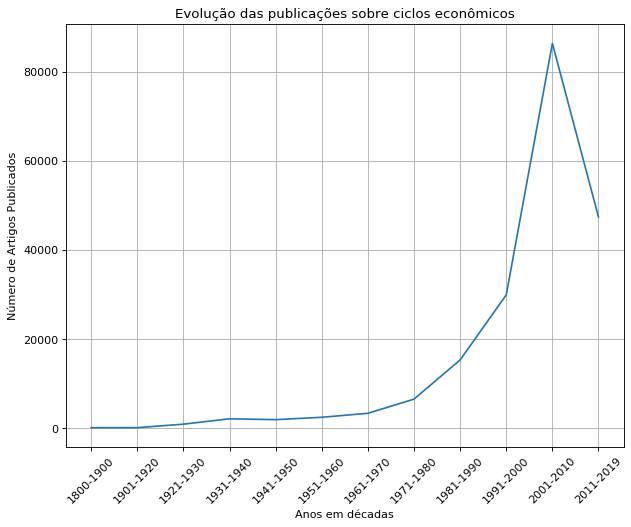

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
Anos    = [ "1800-1900", "1901-1920", "1921-1930", "1931-1940", "1941-1950", "1951-1960", "1961-1970", "1971-1980", 
           "1981-1990", "1991-2000", "2001-2010", "2011-2019"]

Artigos = [ 70, 83, 868, 2070, 1880, 2410, 3310, 6490, 15300, 29900, 86400, 47400 ]

fig, ax = plt.subplots(figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
ax.plot(Anos, Artigos)

ax.set(xlabel='Anos em décadas', ylabel='Número de Artigos Publicados',
       title='Evolução das publicações sobre ciclos econômicos')
ax.grid()

plt.xticks(rotation=45)

plt.show()

In [15]:
40/12

3.3333333333333335

In [16]:
59/12

4.916666666666667

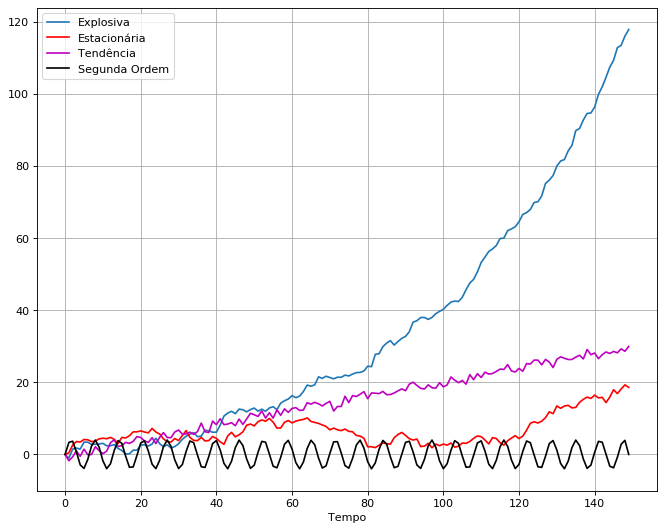

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

N = 150
beta0  = 1.02
beta01 = 1.0
beta02 = 0.2

beta11 = 1.1
beta12 = -1

ys  = np.zeros(N)
ys2 = np.zeros(N)
ys3 = np.zeros(N)
ys4 = np.zeros(N)
ys4[1] = 1/3

for numHarm in range(1,N):
    ys[numHarm] =   ys[numHarm-1]*beta0 + random.normalvariate(0,1)
    ys2[numHarm] = ys2[numHarm-1]*beta01 + random.normalvariate(0,1)
    ys3[numHarm] = numHarm*beta02 + random.normalvariate(0,1)

for numHarm in range(2,N-1):
    ys4[numHarm] = ys4[numHarm-1]*beta11 + ys4[numHarm-2]*beta12

fig, ax = plt.subplots(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.grid()
plt.plot(ys, label='Explosiva')
plt.plot(ys2, 'r', label='Estacionária')
plt.plot(ys3, 'm', label='Tendência')
plt.plot(10*ys4, 'k', label='Segunda Ordem')
plt.legend()
plt.xlabel('Tempo')
plt.show()

No handles with labels found to put in legend.


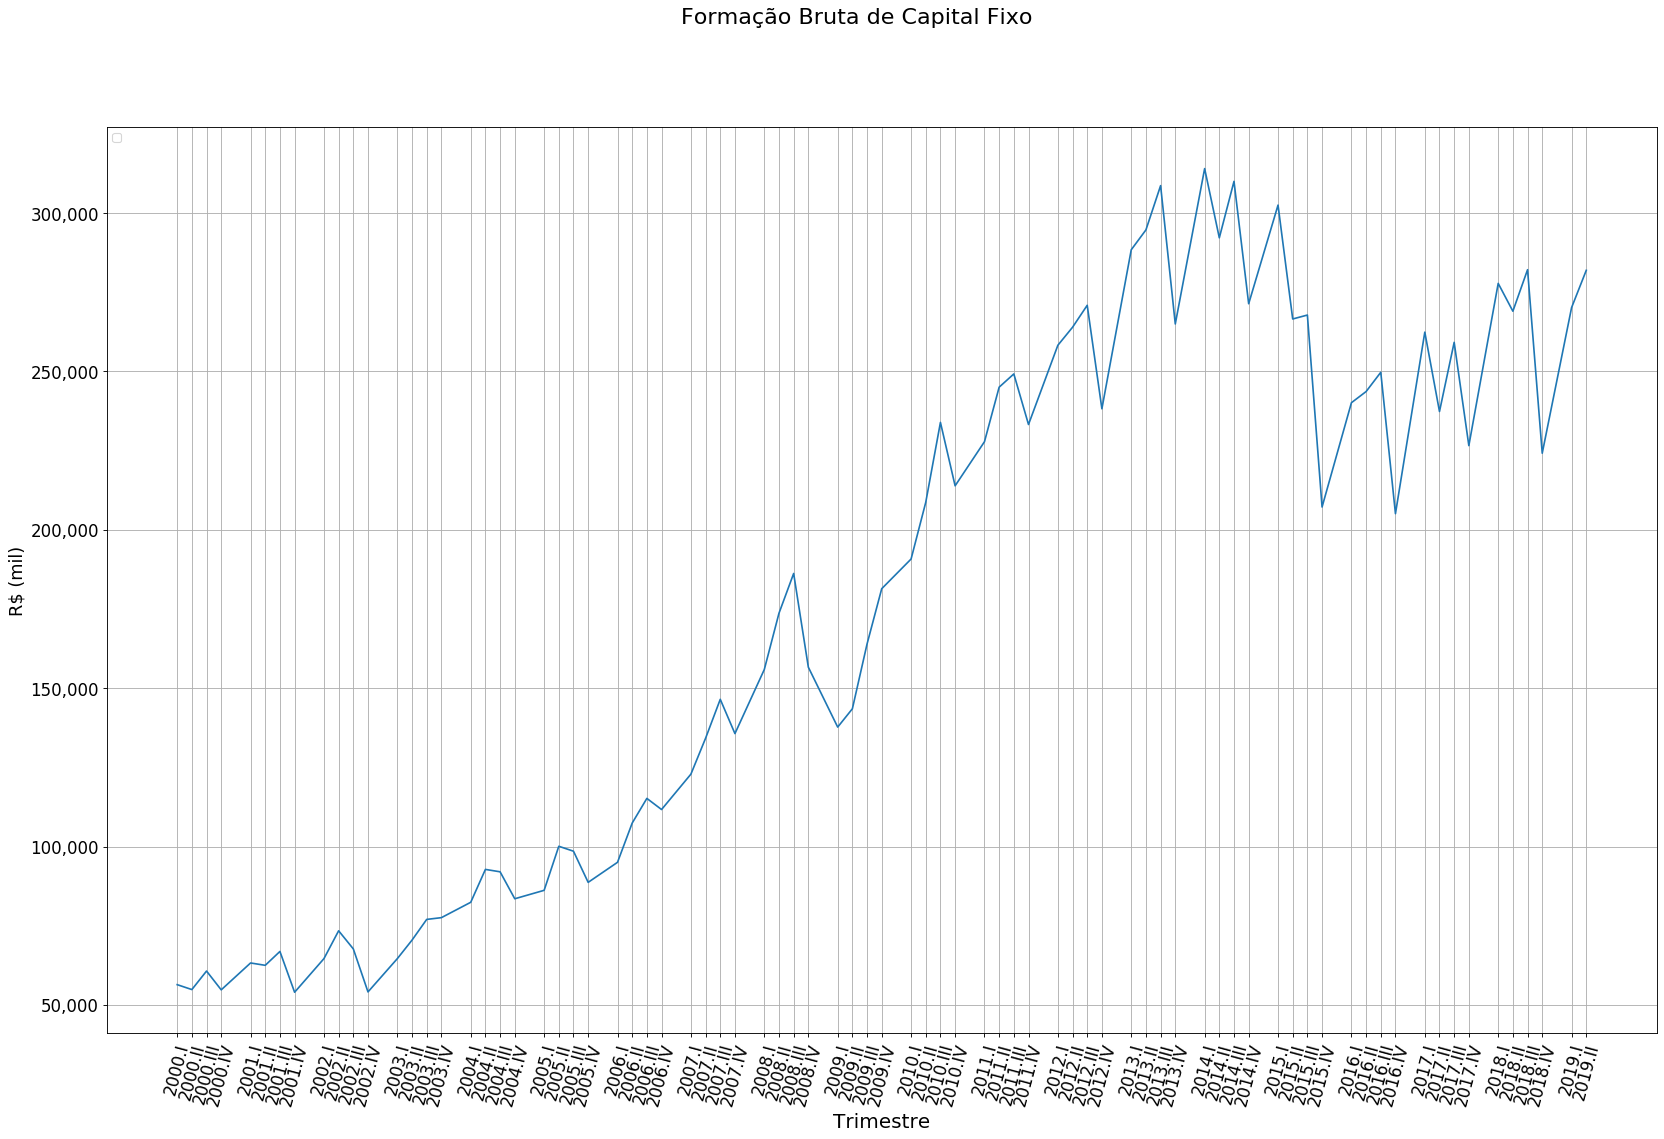

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib.ticker as mtick


xl = pd.ExcelFile('../data/Tab_Compl_CNT_2T19.xls')

df = xl.parse("CEI",skiprows=2)
d = { 'Ano' : df['Período'], 'FBCF': df['( - ) Formação bruta de capital'], 'PIB': df['Produto Interno Bruto - PIB'], 'Poup': df['(=) Poupança bruta'], 'CapFina': df['(=) Capacidade / necessidade líquida de financiamento'] }
dfe = pd.DataFrame(d)
dfe_novo = dfe[dfe.Ano.str.contains(r'.', na=False)]
dfe_novo = dfe_novo[~dfe_novo.Ano.str.contains(r'Esta', na=False)]

fig, ax = plt.subplots(figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(dfe_novo.index, dfe_novo.Ano, rotation=75, fontsize='14')
plt.yticks(fontsize='13')


plt.plot(dfe_novo.index, dfe_novo.FBCF,'-')# label='Formação Bruta de Capital Fixo')
#fmt = 'R${x:,.0f}'
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.legend(loc='upper left')
plt.grid()

#ax.set(xlabel='Trimestre', ylabel='Reais (mil)',
#       title='Formação Bruta de Capital Fixo', fontsize=16)

fig.suptitle('Formação Bruta de Capital Fixo', fontsize=20)
plt.xlabel('Trimestre', fontsize=18)
plt.ylabel('R$ (mil)', fontsize=16)


ax.tick_params(axis='both', which='major', labelsize=15)

#plt.xticks(rotation=45)

plt.show()

